In [86]:
# Loading all the required libaries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re          # To clean the data 
import missingno   # to visualize missing values

In [87]:
# Set the working directory
os.chdir('E:/documents')
os.getcwd()

'E:\\documents'

In [88]:
# Load the data from the local machine
df = pd.read_csv('train_cab.csv')
df1 = pd.read_csv('test_cab.csv')

In [89]:
copy = df.copy()

In [91]:
df.shape

(16067, 7)

In [92]:
df1.shape

(9914, 6)

In [93]:
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [94]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [95]:
df.nunique()

fare_amount            468
pickup_datetime      16021
pickup_longitude     13789
pickup_latitude      14241
dropoff_longitude    13887
dropoff_latitude     14263
passenger_count         27
dtype: int64

In [96]:
#Remove duplicate elements in order to avoid data leakage.
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


There are no duplicate elements in the data.

# Cleaning of data

In [97]:
for i in df.columns:
    print('No of unique values in {} is {}'.format(i,df[i].nunique()))

No of unique values in fare_amount is 468
No of unique values in pickup_datetime is 16021
No of unique values in pickup_longitude is 13789
No of unique values in pickup_latitude is 14241
No of unique values in dropoff_longitude is 13887
No of unique values in dropoff_latitude is 14263
No of unique values in passenger_count is 27


We have to convert the pickup_datetime to the datetime datatype so that we can extract date,day,month etc. 

In [98]:
# I have observed that the fare amount has non-integer value.
df.loc[df['fare_amount']=='430-','fare_amount']=430

In [99]:
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [100]:
df['fare_amount']=df['fare_amount'].astype('float64')

In [101]:
df[df['fare_amount']>430]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
607,453.0,2011-03-03 07:40:59 UTC,-74.007816,40.733536,-73.986556,40.740040,1.0
980,434.0,2011-10-24 22:54:00 UTC,-73.990602,40.761100,-73.960025,40.779580,2.0
1015,54343.0,2015-02-27 17:03:50 UTC,-74.003319,40.727455,-73.964470,40.764378,1.0
1072,4343.0,2012-01-15 20:42:04 UTC,-73.976309,40.751634,-74.014854,40.709044,1.0


In [102]:
# Cleaning the pickup_datetime variable
noise1 =[]
for i in range(0,len(df)):
    if re.match("\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2} UTC",df.iloc[i,1]):
        continue
    else:
        noise1.append(i)

pickup_datetime variable has noisy data so we need to remove that noisy data by using regular expression.

In [103]:
# Remove the noisy data
if(len(noise1)<10):
    df=df.drop(index=noise1)
else:
    print('Noisy data is more')

I don't wan't to remove more information from the data. So it's better to go for any imputation method if we have more noisy data.

In [104]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [105]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [106]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

# Missing Value Analysis

In [107]:
df.isna().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

''

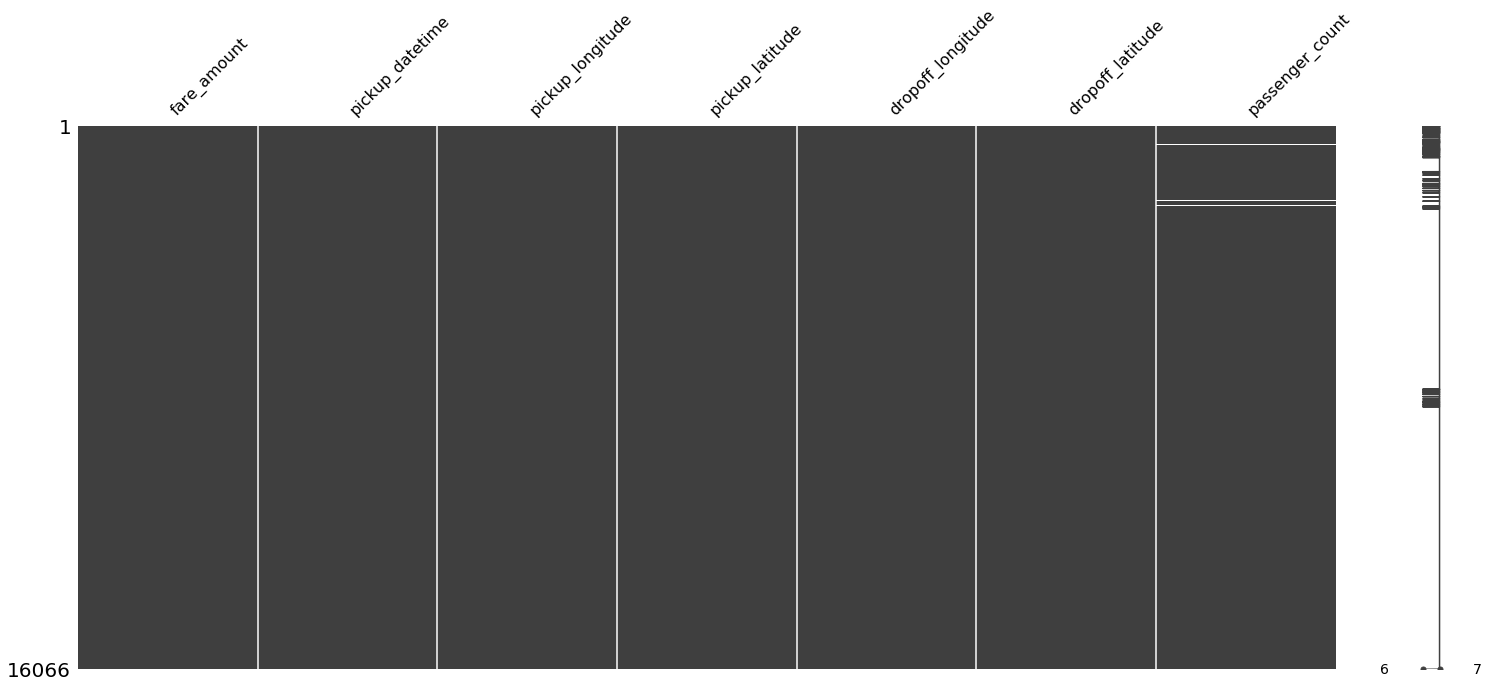

In [108]:
missingno.matrix(df)
;

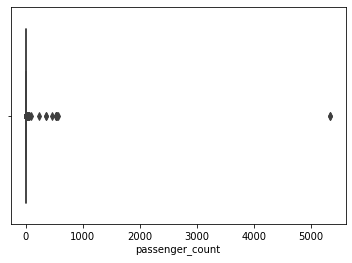

In [109]:
# Dealing with outliers in passenger_count variable
sns.boxplot(x='passenger_count',data=df)

Also passenger_count might have outliers because it's impossible to have 27 unique arrangements in the car. so we need to check for the outliers in the passenger_count before we move further. 

In [110]:
len(df[df['passenger_count']>10])

20

As we know that the car doesn't have more than 10 seats. So the passenger_count greater than 10 are considered as outliers in the data and we have to remove them.

In [111]:
df.loc[df['passenger_count']>10,'passenger_count']=np.nan

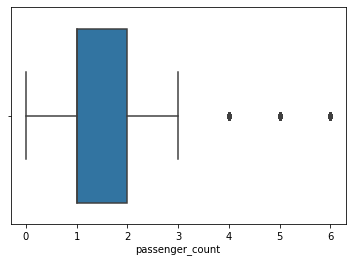

In [112]:
sns.boxplot(x='passenger_count',data=df)

I have imputed all the outliers with nan and we can deal with that in missing value anlysis.

In [113]:
df['fare_amount'].fillna(0,inplace=True)

In [114]:
df['passenger_count'].fillna(0,inplace=True)

As we know that the fare_amount and passenger_count values should not be zero. So I am imputing nan values with 0. By doing this we can also deal with zeros already present in the variables.

In [115]:
df['passenger_count']= df['passenger_count'].astype('int64')

We know that the pasenger_count should not be in decimals. So I am converting the passenger_count variable to int datatype.

In [116]:
df['passenger_count'].unique()
# Now it makes sense of the data that we have.

array([1, 2, 3, 0, 6, 5, 4], dtype=int64)

In [117]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [118]:
unique=df['passenger_count'].unique()

In [119]:
# splitting the dataframe using passenger_count as a key
store = {word : pd.DataFrame for word in unique}

for i in unique:
    store[i]=df[df['passenger_count']==i]

In [120]:
# Impute the missing values in fare_amount by taking the help of passenger_count variable
for i in range(0,len(df)):
    if(df.iloc[i,0]==0):
        df.iloc[i,0]=store[df.iloc[i,6]]['fare_amount'].mean()

In [121]:
unique1 = df['fare_amount'].unique()

In [122]:
df['passenger_count'].unique()

array([1, 2, 3, 0, 6, 5, 4], dtype=int64)

In [123]:
#Splitting the dataframe by using fare_amount variable as a key
store1 = {word1 :pd.DataFrame for word1 in unique1}

for i in unique1:
    store1[i]=df[df['fare_amount']==i]

In [124]:
#Impute the missing values in passenger_count by using fare_amount variable
for k in range(0,len(df)):
    if(df.iloc[k,6]==0):
        df.iloc[k,6]=store1[df.iloc[k,0]]['passenger_count'].mean()

In [125]:
df['passenger_count']=df['passenger_count'].astype('int64')

In [126]:
#Removing the observations whose fare_amount or passneger_count is equal to zero
df=df.loc[~(df['passenger_count']==0),]
df=df.loc[~(df['fare_amount']==0),]

# Outlier Analysis

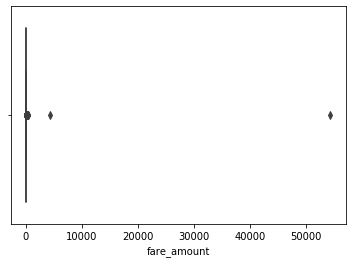

In [127]:
sns.boxplot(x='fare_amount',data=df)

In [128]:
df=df.loc[~(df['fare_amount']>3000),]

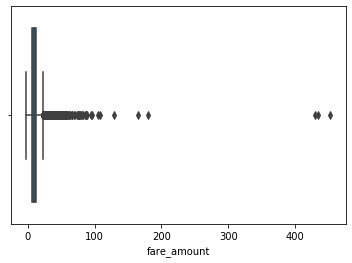

In [129]:
sns.boxplot(x='fare_amount',data=df)

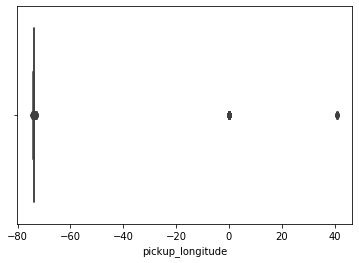

In [130]:
sns.boxplot(x='pickup_longitude',data=df)

In [131]:
df=df.loc[~(df['pickup_longitude']>-40),:]

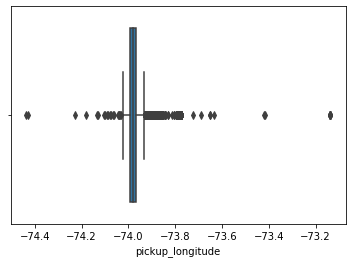

In [132]:
sns.boxplot(x='pickup_longitude',data=df)

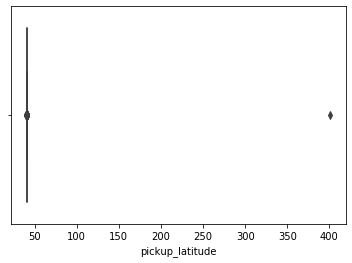

In [133]:
sns.boxplot(x='pickup_latitude',data=df)

In [134]:
df=df.loc[~(df['pickup_latitude']>100),:]

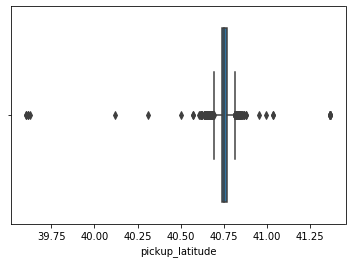

In [135]:
sns.boxplot(x='pickup_latitude',data=df)

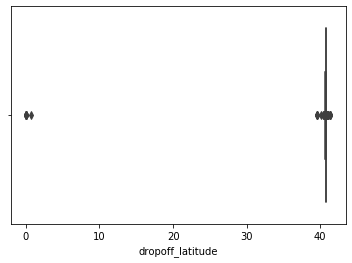

In [136]:
sns.boxplot(x='dropoff_latitude',data=df)

In [137]:
df=df.loc[~(df['dropoff_latitude']<25),:]

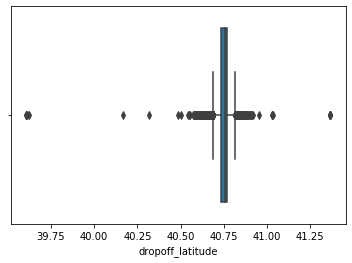

In [138]:
sns.boxplot(x='dropoff_latitude',data=df,orient='h')

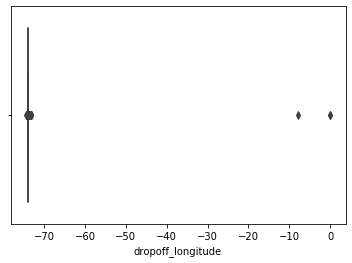

In [139]:
sns.boxplot(x='dropoff_longitude',data=df)

In [140]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Feature Engineering

In [141]:
# Extract hour variable from pickup_datetime
def get_hour(dt):
    return dt.hour

df['hour']=df['pickup_datetime'].map(get_hour)

df['hour']=df['hour'].astype('object')

In [142]:
# Extract year variable from pickup_datetime
def get_yr(dt):
    return dt.year

df['year']=df['pickup_datetime'].map(get_yr)


df['year']=df['year'].astype('object')

In [143]:
#Extract month variable from pickup_datetime
def get_mon(dt):
    return dt.month

df['month']=df['pickup_datetime'].map(get_mon)

df['month']=df['month'].astype('object')

In [144]:
#Extract day variable from pickup_datetime
def get_day(dt):
    return dt.day

df['day']=df['pickup_datetime'].map(get_day)

df['day']=df['day'].astype('object')

In [145]:
#calculating longitude distance
df['dist_longitude']=df['pickup_longitude']-df['dropoff_longitude']

In [146]:
#calculating latitude distance
df['dist_latitude']=df['pickup_latitude']-df['dropoff_latitude']

In [147]:
# Drop the timestamp variable
df=df.drop('pickup_datetime',axis=1)

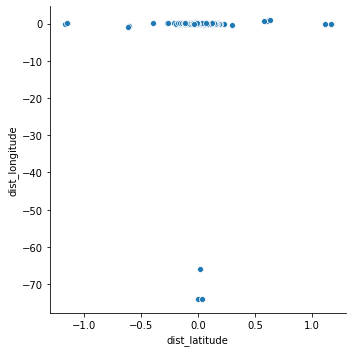

In [148]:
sns.relplot(x='dist_latitude',y='dist_longitude',data=df)

I have been observed the zeros in latitude and longitude variables and also the same pickup and dropoff locations. I am assuming that no two locations have same latitude and longitude. So it's better to drop those observations in order to avoid confusion to our machine learning model.

In [149]:
df=df.loc[~(df['dist_longitude']==0),:]

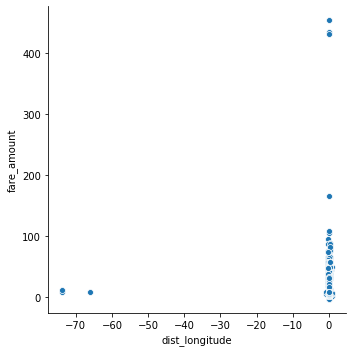

In [150]:
sns.relplot(x='dist_longitude',y='fare_amount',data=df)

We can see that the distance between pickup and dropoff longitudes is very high (i.e greater than 30) in some observations. so I consider it as errors and removing those observations.

In [151]:
df=df.loc[~(df['dist_longitude']>20),]

In [152]:
df=df.loc[~(df['dist_longitude']<-20),]

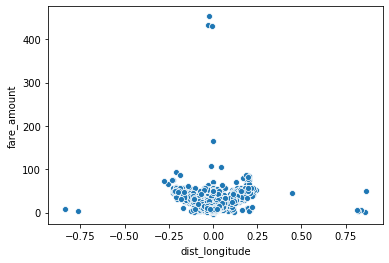

In [153]:
sns.scatterplot(x='dist_longitude',y='fare_amount',data=df)

Also we can see that the fare value is greater than 50000. We should remove those observation to avoid confusion to our model.

# Exploratory Data Analysis

Fare_amount

In [154]:
df['fare_amount'].describe()

count    15565.000000
mean        11.383468
std         11.158414
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

Text(0.5, 1.0, 'Histogram of fare_amount')

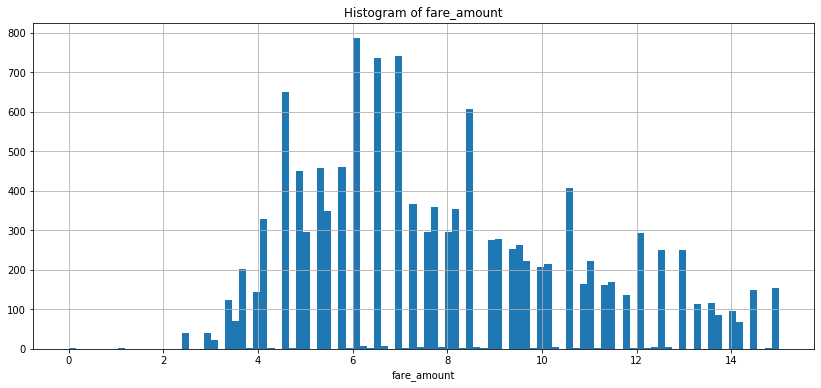

In [155]:
df['fare_amount'].hist(bins=100,figsize=(14,6),range=(0,15))
plt.xlabel('fare_amount')
plt.title('Histogram of fare_amount')

In [156]:
df['fare_amount'].skew()

12.812908734429346

 We can tell that the data is positively skewed. The data doesn't have enough high fare rides. Our model might not perform well with high fare rides because it doesn't have enough high fare rides. It's better to transform the data using log transformation to make our data normal. 

In [157]:
df['fare_amount'].kurtosis()

424.00069033538034

Kurtosis is all about the tailedness of the data. It describes the extreme values in one versus the other tail. High kurtosis indicates that data have high outliers. It also helps us to know whether the data is sufficient for our analysis or not.

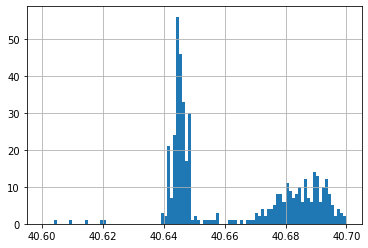

In [158]:
df['pickup_latitude'].hist(bins=100,range=(40.60,40.7))

In [159]:
df['pickup_latitude'].skew()

-9.072009419383798

In [160]:
df['pickup_latitude'].kurtosis() 

343.73100768000586

Text(0.5, 1.0, 'histogram of pickup_longitude')

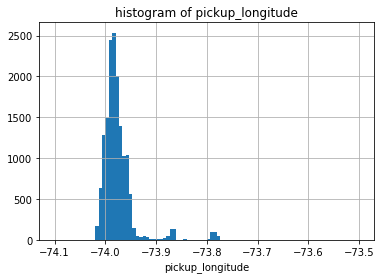

In [161]:
df['pickup_longitude'].hist(bins=90,range=(-74.1,-73.5))
plt.xlabel('pickup_longitude')
plt.title('histogram of pickup_longitude')

In [162]:
df['pickup_longitude'].skew()
# We can see that it is a positively skewed data.

6.0453876063094265

In [163]:
df['pickup_longitude'].kurtosis()
# Positive kurtosis indicates peakedness of the curve is sharp.

89.55959691315869

Text(0.5, 1.0, 'histogram of dropoff_latitude')

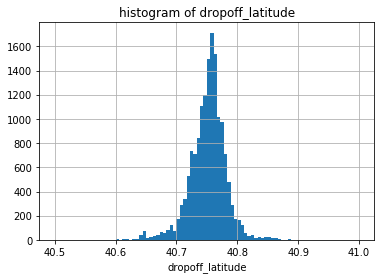

In [164]:
df['dropoff_latitude'].hist(bins=90,range=(40.5,41))
plt.xlabel('dropoff_latitude')
plt.title('histogram of dropoff_latitude')

In [165]:
df['dropoff_latitude'].skew()
# It is a negatevely skewed data

-8.638840954755375

In [166]:
df['dropoff_latitude'].kurtosis()
# The peakedness of the dropoff variable is very high  

273.445838800735

Text(0.5, 1.0, 'histogram of dropoff_longitude')

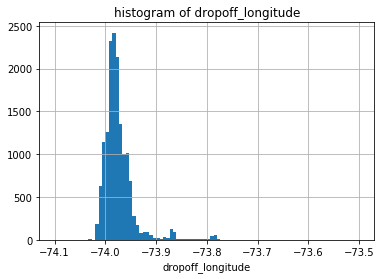

In [167]:
df['dropoff_longitude'].hist(bins=90,range=(-74.1,-73.5))
plt.xlabel('dropoff_longitude')
plt.title('histogram of dropoff_longitude')

In [168]:
df['dropoff_longitude'].skew()

3.981318617423087

In [169]:
df['dropoff_longitude'].kurtosis()

52.293199895521866

In [170]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,year,month,day,dist_longitude,dist_latitude
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,2009,6,15,-0.002701,0.009041
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,2010,1,5,-0.036780,-0.070701
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,8,18,0.008504,0.010708
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,4,21,0.004437,-0.024949
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,2010,3,9,-0.011440,-0.015754


# Bivariate Analysis

In [171]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'year', 'month', 'day', 'dist_longitude', 'dist_latitude'],
      dtype='object')

Text(0.5, 1.0, 'Average Fare in a Year')

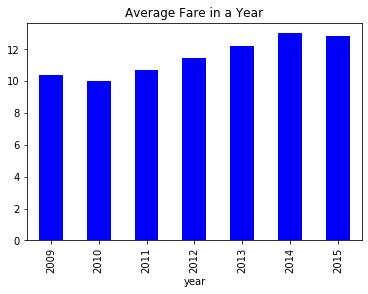

In [174]:
df.groupby('year')['fare_amount'].mean().plot.bar(color='b')
plt.title('Average Fare in a Year')

The Average price has been increased by the year.

Text(0.5, 1.0, 'Average fare based on month')

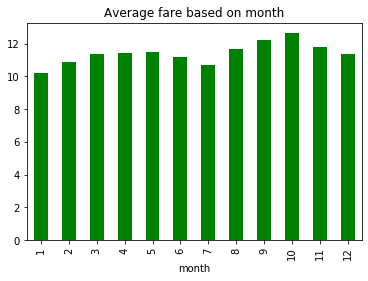

In [175]:
df.groupby('month')['fare_amount'].mean().plot.bar(color='g')
plt.title('Average fare based on month')

We can see that month does have an effect on average fare. Because of the climatic conditions, the fare might change.

Text(0.5, 1.0, 'Average fare based on hour')

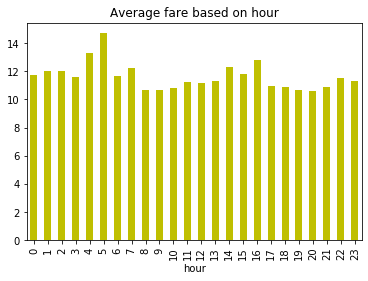

In [176]:
df.groupby('hour')['fare_amount'].mean().plot.bar(color='y')
plt.title('Average fare based on hour')

As we can see that the average fare is comparatively higher in morning and the evening times.

Text(0.5, 1.0, 'Average fare based on day')

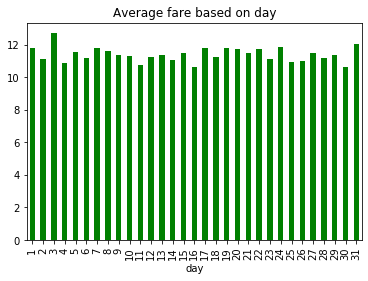

In [177]:
df.groupby('day')['fare_amount'].mean().plot.bar(color='g')
plt.title('Average fare based on day')

Day doesn't have much effect on the fare_amount variable. So it's better to remove this variable from our analysis.

In [178]:
df=df.drop('day',axis=1)

# Correlation Analysis

In [180]:
corr = df.corr()

In [181]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_longitude,dist_latitude
fare_amount,1.000000,0.330288,-0.123391,0.283991,-0.094478,0.004505,0.054207,-0.022756
pickup_longitude,0.330288,1.000000,0.098228,0.262289,0.055301,-0.002193,0.639943,0.037644
pickup_latitude,-0.123391,0.098228,1.000000,0.048515,0.456153,-0.001144,0.044744,0.488016
dropoff_longitude,0.283991,0.262289,0.048515,1.000000,0.172656,-0.004724,-0.573669,-0.123964
dropoff_latitude,-0.094478,0.055301,0.456153,0.172656,1.000000,-0.001010,-0.090547,-0.554126
passenger_count,0.004505,-0.002193,-0.001144,-0.004724,-0.001010,1.000000,0.001900,-0.000080
dist_longitude,0.054207,0.639943,0.044744,-0.573669,-0.090547,0.001900,1.000000,0.130665
dist_latitude,-0.022756,0.037644,0.488016,-0.123964,-0.554126,-0.000080,0.130665,1.000000


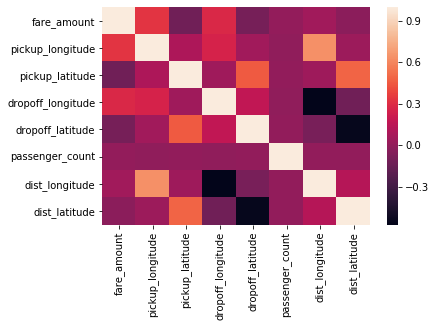

In [182]:
sns.heatmap(corr)

There is no correlation between the numerical variables.

In [183]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'year', 'month', 'dist_longitude', 'dist_latitude'],
      dtype='object')

# Chisquare Test to check dependency

In [184]:
col = ['hour','month','year']

In [185]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [186]:
from scipy.stats import chi2_contingency

In [187]:
for i in col:
    for j in col:
        if(i==j):
            continue
        else:
            chi2,p,dof,ex=chi2_contingency(pd.crosstab(df[i],df[j]))
            print('p value between {} and {} is {}'.format(i,j,p))

p value between hour and month is 0.623207518183256
p value between hour and year is 0.16145231049678885
p value between month and hour is 0.6232075181832565
p value between month and year is 1.7676682752887944e-184
p value between year and hour is 0.16145231049678851
p value between year and month is 1.7676682752887944e-184


Null hypothesis(ho):Two variables are independent
Alternate hypothesis(h1): Two variables are not independent
If p<0.05 we will reject the Null hypothesis saying that two variables are dependent on each other. We can see that the year and month are dependent on each other. So it's better to drop month variable from our analysis. 

In [188]:
df = df.drop('month',axis=1)

# One Hot Encoding

In [189]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                  object
year                  object
dist_longitude       float64
dist_latitude        float64
dtype: object

In [190]:
df_dum = pd.get_dummies(df,drop_first=True)

In [191]:
df_dum.shape

(15565, 37)

# Scaling of data

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
norm=scaler.fit_transform(df_dum)

In [193]:
norm = pd.DataFrame(norm)

In [194]:
norm.columns = df_dum.columns

In [195]:
norm.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_longitude,dist_latitude,hour_1,hour_2,...,hour_20,hour_21,hour_22,hour_23,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,0.016447,0.456568,0.634241,0.353724,0.628735,0.0,0.490597,0.504627,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.043640,0.324548,0.628559,0.227392,0.668326,0.0,0.470556,0.470459,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.019079,0.350155,0.656902,0.216404,0.650473,0.2,0.497186,0.505341,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.023465,0.346778,0.640948,0.216105,0.654748,0.0,0.494794,0.490063,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.018202,0.361411,0.660724,0.248145,0.669324,0.0,0.485458,0.494003,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [196]:
x=norm.drop('fare_amount',axis=1)
y=norm['fare_amount']

In [197]:
#splitting of data
# As it is a time series data, we can't use train_test_split to split the data
train_size=0.7*len(df)
train_size=int(train_size)

x_train=x.iloc[0:train_size,:]
x_test=x.iloc[train_size:,:]

y_train=y.iloc[0:train_size,]
y_test=y.iloc[train_size:,]

In [198]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_longitude,dist_latitude,hour_1,hour_2,hour_3,...,hour_20,hour_21,hour_22,hour_23,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,0.456568,0.634241,0.353724,0.628735,0.0,0.490597,0.504627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.324548,0.628559,0.227392,0.668326,0.0,0.470556,0.470459,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.350155,0.656902,0.216404,0.650473,0.2,0.497186,0.505341,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.346778,0.640948,0.216105,0.654748,0.0,0.494794,0.490063,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.361411,0.660724,0.248145,0.669324,0.0,0.485458,0.494003,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Applying different models to our data

In [199]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
RF_model = RandomForestRegressor(n_estimators=100,max_features = 4).fit(x_train,y_train)

In [201]:
RF_predictions = RF_model.predict(x_test)

In [202]:
from sklearn.metrics import mean_squared_error

In [203]:
np.sqrt(mean_squared_error(y_test,RF_predictions))

0.009735693419851216

In [204]:
from sklearn.metrics import mean_absolute_error

In [205]:
mean_absolute_error(y_test,RF_predictions)

0.005024141083866752